In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split



In [2]:
hd=pd.read_excel("cleveland.xlsx")

In [3]:
hd=hd.drop(hd.index[172], axis=0)

X = hd.iloc[:, :13]

y = hd.iloc[:, 13]
y = y.replace(["negative", "positive"], [0, 1])

#### a. K-Means

In [4]:
std=StandardScaler()
X_std=std.fit_transform(X)

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_std)

In [97]:
X_p1, X_p2, y_1, y_2=train_test_split(X_pca, y, test_size=0.5, random_state=286)

In [118]:
table=pd.DataFrame()

table["y_1"]=y_1.values
table["y_2"]=y_2.values
table["pca1_0"]=X_p1.T[0]
table["pca1_1"]=X_p1.T[1]
table["pca2_0"]=X_p2.T[0]
table["pca2_1"]=X_p2.T[1]

for n in range(2,5):
    pred_1=KMeans(n_clusters=n, random_state=286).fit_predict(X_p1)
    pred_2=KMeans(n_clusters=n, random_state=286).fit_predict(X_p2)
    
    table["c_"+str(n)+"_smp_1"]=pred_1
    table["c_"+str(n)+"_smp_2"]=pred_2

In [99]:
table.head()

,y_1,y_2,pca1_0,pca1_1,pca2_0,pca2_1,c_2_smp_1,c_2_smp_2,c_3_smp_1,c_3_smp_2,c_4_smp_1,c_4_smp_2
0,0,0,-1.063833,-1.544606,-2.934771,0.137672,0,0,1,0,1,2
1,0,0,-0.544280,-1.230877,-0.497888,0.984326,0,0,1,0,1,0
2,0,0,0.805223,1.256648,-1.575920,0.325431,1,0,2,0,0,2
3,0,0,-0.428174,-1.717834,0.916316,1.098057,0,1,1,1,2,0
4,0,0,-1.279228,-0.130399,-0.501202,-0.737022,0,0,2,2,1,1


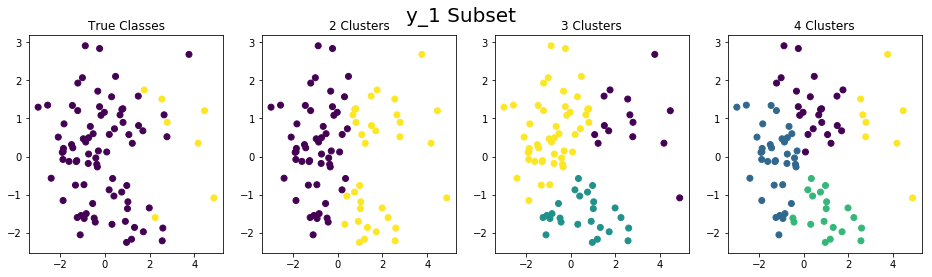

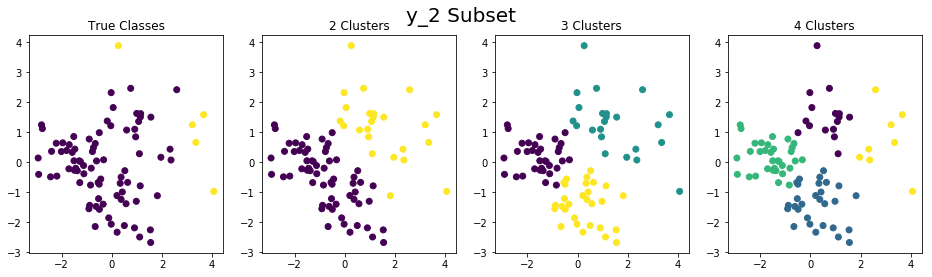

In [100]:
for i in range(2):
    f, subp=plt.subplots(1,4, figsize=(16,4))

    subp[0].scatter(table["pca"+str(i+1)+"_0"], table["pca"+str(i+1)+"_1"], c=table["y_"+str(i+1)])
    subp[0].set_title("True Classes")
    
    for j in range(1,4):
        subp[j].scatter(table["pca"+str(i+1)+"_0"], table["pca"+str(i+1)+"_1"], c=table["c_"+str(j+1)+"_smp_"+str(i+1)])
        subp[j].set_title(str(j+1)+" Clusters")
    
    plt.suptitle("y_"+str(i+1)+" Subset", fontsize=20)
    plt.tight_layout
    plt.show()

Gerçek değerlere en yakın sonuçlar K değeri 2 olduğunda elde edilmektedir.

#### b. ARI

In [101]:
for i in range(1,3):
    print("ALT SET= {}\n".format(i))
    for j in range(2,5):
        ari=metrics.adjusted_rand_score(table["y_"+str(i)], table["c_"+str(j)+"_smp_"+str(i)])
        print("Küme= {} --> ARI= {:.4f}\n".format(j,ari))
    print("\n")

ALT SET= 1

Küme= 2 --> ARI= 0.1200

Küme= 3 --> ARI= 0.1452

Küme= 4 --> ARI= 0.0926



ALT SET= 2

Küme= 2 --> ARI= 0.1857

Küme= 3 --> ARI= 0.0393

Küme= 4 --> ARI= 0.0738





ARI değerinin yüksek olmasını isteriz. Bu açıdan bakıldığında;

1. İlk alt veri seti için en iyi küme sayısı 3,
2. İkinci alt veri seti için en iyi küme sayısı 2,

olmalıdır. 

Metriğimiz, ilk alt set için hatalı değer döndürmektedir.

#### c. Silhouette

In [127]:
for i in range(1,3):
    print("ALT SET= {}\n".format(i))
    for j in range(2,5):
        pred=table["c_"+str(j)+"_smp_"+str(i)]
        
        if i==1:
            X_p=X_p1
        else:
            X_p=X_p2
            
        silhouette=metrics.silhouette_score(X_p, pred)
        print("Küme= {} --> Silhouette= {:.4f}\n".format(j, silhouette))
    print("\n")

ALT SET= 1

Küme= 2 --> Silhouette= 0.3776

Küme= 3 --> Silhouette= 0.4036

Küme= 4 --> Silhouette= 0.4000



ALT SET= 2

Küme= 2 --> Silhouette= 0.4302

Küme= 3 --> Silhouette= 0.4573

Küme= 4 --> Silhouette= 0.4709





Silhouette değerinin düşük olmasını isteriz. Bu açıdan bakıldığında;

1. İlk alt veri seti için en iyi küme sayısı 2,
2. İkinci alt veri seti için en iyi küme sayısı 2,

olmalıdır.

Metriğimiz, doğru küme sayısını vermektedir.